In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Problem Statement

#Background   
Heart disease is one of the leading causes of death worldwide, accounting for millions of deaths each year. Early detection and accurate prediction of heart disease can significantly improve patient outcomes and reduce the healthcare burden. Advances in machine learning and data analytics provide new opportunities to develop predictive models that can identify individuals at risk of heart disease before they exhibit symptoms.

#Objective  
The objective of this project is to develop a machine learning model that can accurately predict the presence of heart disease based on a set of clinical and demographic features. The model should be able to assist healthcare professionals in identifying high-risk individuals, enabling timely interventions and personalized treatment plans.

Scope

##Step-2-Data Collection



In [ ]:
##Load the Dataset
df = pd.read_csv('/content/drive/MyDrive/Heart_Disease_Prediction.csv')
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [ ]:
## Data Shape
df.shape

(270, 14)

So We have 270 rows and 14 columns in our Dataset

## Step-3- Data Preprosesing

In [ ]:
## find Duplicates
df.duplicated().sum()

0

So,there is no duplicates in our dataset

In [ ]:
## Chacking null or missing values
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

So,We dont have null or missing values

In [ ]:
##info of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
## Desribe Dataset
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


##Step-4-EDA

In [ ]:
df['Sex'].value_counts()

Sex
1    183
0     87
Name: count, dtype: int64

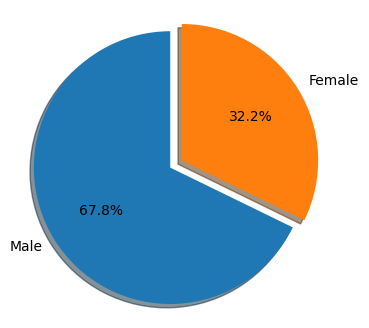

In [ ]:
labels = 'Male', 'Female'
sizes = df['Sex'].value_counts()
explode = (0, 0.1)
plt.figure(figsize=(4,4))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

As We can see we have more Males Patients than Females Patients

In [ ]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

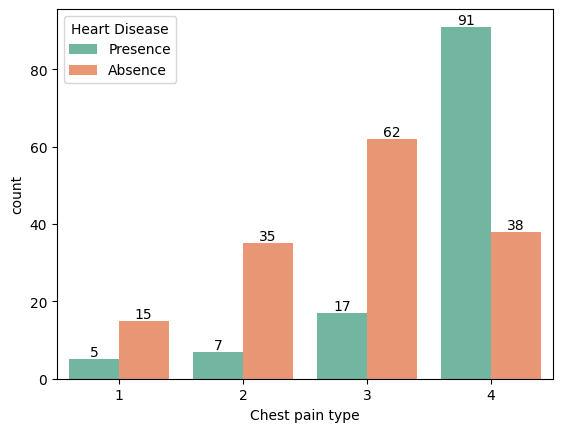

In [ ]:
ax = sns.countplot(df,x='Chest pain type',hue = 'Heart Disease',palette='Set2')
for lab in ax.containers:
    ax.bar_label(lab)
plt.show()

As We can see Chest Pain Type is 4 there is too nuch patients that have Heart Disease.So We can state that if the patient has very high Chest Pain there is a high the patient has some heart disease

In [ ]:
df['Sex'].value_counts()

Sex
1    183
0     87
Name: count, dtype: int64

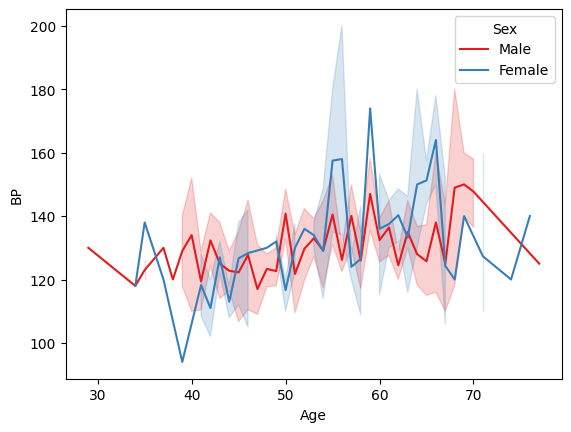

In [ ]:
df_copy = df.copy()
df_copy['Sex'] = df_copy['Sex'].replace({1: 'Male', 0: 'Female'})
sns.lineplot(df_copy,x = 'Age',y = 'BP',hue = 'Sex',palette="Set1")
plt.show()

AS We can see More Females in the age group of 50-70 has experienced higher Blood Pressure than Man


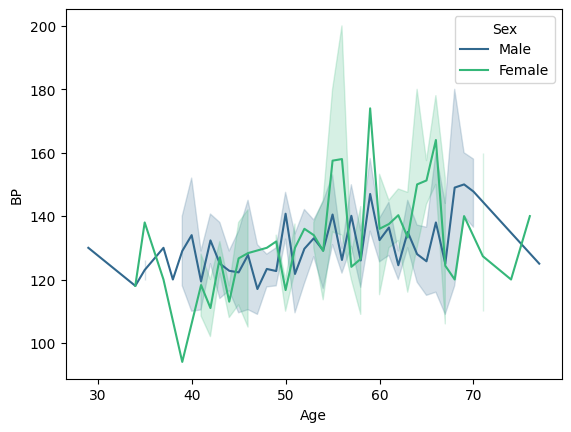

In [ ]:
sns.lineplot(df_copy,x = 'Age',y = 'BP',hue = 'Sex',palette="viridis")
plt.show()

AS We can see More Females in the age group of 50-70 has experienced higher Cholestrol than Man


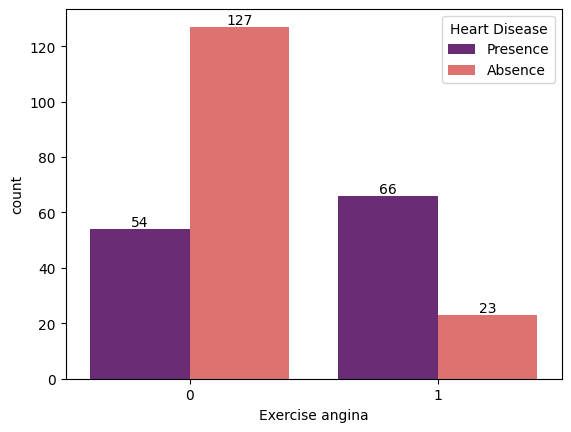

In [ ]:
## 0 - False
## 1 - True
ax = sns.countplot(df,x ='Exercise angina',hue = 'Heart Disease',palette= "magma")
for lab in ax.containers:
    ax.bar_label(lab)

Exercise angina, also known as exertional angina or angina pectoris, is a type of chest pain that occurs during physical exertion or stress. It is typically caused by reduced blood flow to the heart muscle due to the narrowing or blockage of the coronary arteries, a condition known as coronary artery disease (CAD).

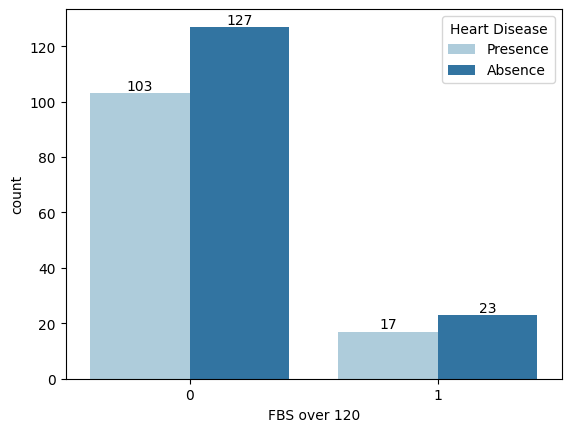

In [ ]:
ax = sns.countplot(df,x = 'FBS over 120',hue = 'Heart Disease',palette = "Paired")
for lab in ax.containers:
    ax.bar_label(lab)


<Axes: xlabel='Heart Disease', ylabel='ST depression'>

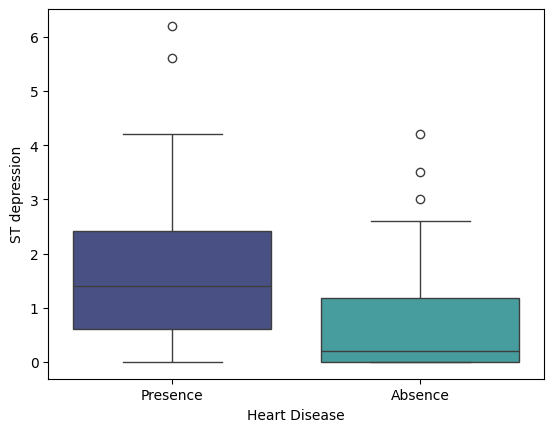

In [ ]:
sns.boxplot(df,x = 'Heart Disease',y = 'ST depression',palette = 'mako')

<Axes: xlabel='Heart Disease', ylabel='Thallium'>

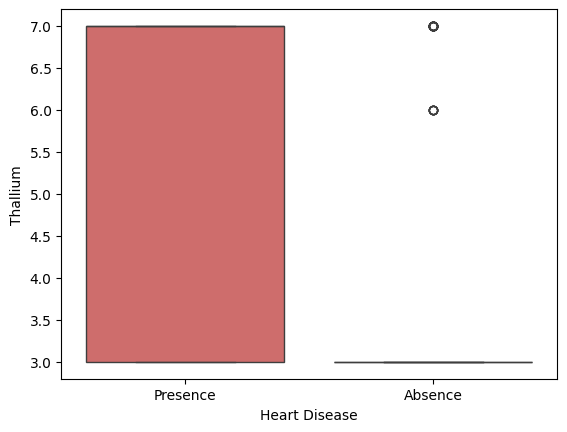

In [ ]:
sns.boxplot(df,x = 'Heart Disease',y = 'Thallium',palette = 'flare')

In [ ]:
df['Heart Disease'] = df['Heart Disease'].map({'Absence': 0, 'Presence': 1})

In [ ]:
X = df.drop(columns=['Heart Disease'])
y = df['Heart Disease']

## Step-5- Model Selection, Training & Evaluation

Train-Test Split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
le = LabelEncoder()
y=le.fit_transform(y)

Feature Extraction

In [ ]:
pca = PCA(n_components=9)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

Model Bulilding

We do it with logistis regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_trf,y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test_trf)

Accuracy Prediction

In [ ]:
accuracy_score(y_test, y_pred)

0.8555555555555555

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train_trf,y_train)
y_pred2 = knn.predict(X_test_trf)

In [ ]:
accuracy_score(y_test, y_pred2)

0.7666666666666667

In [ ]:
svc = SVC()
svc.fit(X_train_trf,y_train)
y_pred3 = svc.predict(X_test_trf)
accuracy_score(y_test, y_pred3)

0.8222222222222222

In [ ]:
rf = RandomForestClassifier(
    n_estimators=50,
    random_state=2
)

rf.fit(X_train_trf, y_train)

RandomForestClassifier(n_estimators=50, random_state=2)

In [ ]:
y_pred4 = rf.predict(X_test_trf)
accuracy_score(y_test, y_pred4)

0.8111111111111111

So As We can see we got almost 85% Accuracy